# Data Mining 15.0621 Homework Assignment 1
## Questions 2.11, 3.3, 3.4 (a & b)
### By: Jonathan Johannemann

In [9]:
import pandas as pd,matplotlib.pyplot as plt,datetime as dt,warnings,numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

## Question 2.11

The objective of this question is to determine if some of the variables that are provided in the ToyotaCorolla dataset are correlated. After reading in the data, we can see that there are variables that are highly corrolated. To give an idea of the most correlated variables, I provided an arbitrary threshold of 0.8 for the absolute value of the correlation coefficient.

In [10]:
df211 = pd.read_csv('C:\Users\Jonathan\Documents\JMP_Data\ToyotaCorolla.csv',sep=',',header=0)

#### Question 2.11 (a) 

In [11]:
corr_mat = df211.corr()
corr_mat.values[[np.arange(len(corr_mat))]*2]=0
corr_mat = corr_mat[np.abs(corr_mat)>0.8].fillna(0).reset_index()

for col in corr_mat.columns.values[1:]:
    if len(corr_mat[corr_mat[col]!=0][col].index)>0:
        print "="*40
        print "Looking at: ",col
        for i in corr_mat[corr_mat[col]!=0][col].index:
            print corr_mat['index'][i]," : ",corr_mat[corr_mat[col]!=0][col][i]
print "="*40

Looking at:  ﻿Id
Age_08_04  :  0.906131716618
Mfg_Year  :  -0.919523232904
Looking at:  Price
Age_08_04  :  -0.876590497144
Mfg_Year  :  0.885159220449
Looking at:  Age_08_04
﻿Id  :  0.906131716618
Price  :  -0.876590497144
Mfg_Year  :  -0.983661157395
Looking at:  Mfg_Year
﻿Id  :  -0.919523232904
Price  :  0.885159220449
Age_08_04  :  -0.983661157395
Looking at:  Central_Lock
Powered_Windows  :  0.875552474431
Looking at:  Powered_Windows
Central_Lock  :  0.875552474431
Looking at:  Radio
Radio_cassette  :  0.991620982708
Looking at:  Radio_cassette
Radio  :  0.991620982708


In [35]:
nonlinear_corr_mat = df211.corr('spearman')
nonlinear_corr_mat.values[[np.arange(len(nonlinear_corr_mat))]*2]=0
nonlinear_corr_mat = nonlinear_corr_mat[np.abs(nonlinear_corr_mat)>0.8].fillna(0).reset_index()

for col in nonlinear_corr_mat.columns.values[1:]:
    if len(nonlinear_corr_mat[nonlinear_corr_mat[col]!=0][col].index)>0:
        print "="*40
        print "Looking at: ",col
        for i in nonlinear_corr_mat[nonlinear_corr_mat[col]!=0][col].index:
            print nonlinear_corr_mat['index'][i]," : ",nonlinear_corr_mat[nonlinear_corr_mat[col]!=0][col][i]
print "="*40

Looking at:  ﻿Id
Age_08_04  :  0.937233940591
Mfg_Year  :  -0.968028186165
Looking at:  Price
Age_08_04  :  -0.842279312543
Mfg_Year  :  0.853344621244
Looking at:  Age_08_04
﻿Id  :  0.937233940591
Price  :  -0.842279312543
Mfg_Year  :  -0.971920946522
Looking at:  Mfg_Year
﻿Id  :  -0.968028186165
Price  :  0.853344621244
Age_08_04  :  -0.971920946522
Looking at:  Central_Lock
Powered_Windows  :  0.875552474431
Looking at:  Powered_Windows
Central_Lock  :  0.875552474431
Looking at:  Radio
Radio_cassette  :  0.991620982708
Looking at:  Radio_cassette
Radio  :  0.991620982708


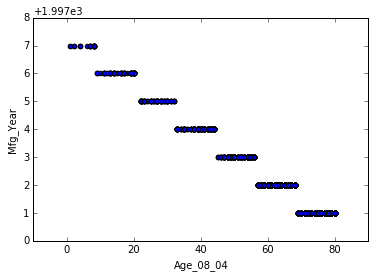

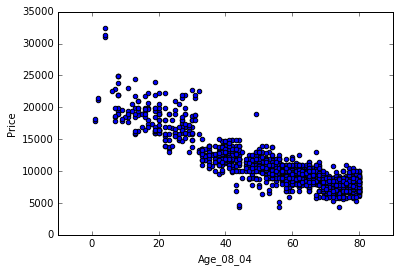

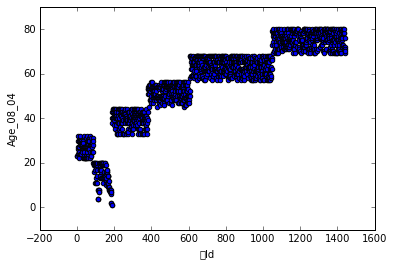

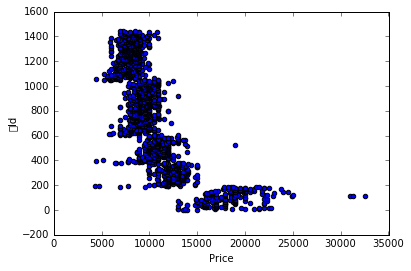

In [34]:
df211.plot(kind='scatter',x='Age_08_04',y='Mfg_Year')
df211.plot(kind='scatter',x='Age_08_04',y='Price')
df211.plot(kind='scatter',x='\xef\xbb\xbfId',y='Age_08_04') #don't be fooled, that's just Id for the x value
df211.plot(kind='scatter',x='Price',y='\xef\xbb\xbfId')

I checked for both nonlinear and linear correlations between the variables and output. As we can see, there are multiple relationships that are highly correlated. In particular, radio and radio cassette are pretty obvious. We also notice that Price, Age, and Mfg_Year are correlated which seems fairly normal; newer cars are worth more than older cars.

#### Question 2.11 (b)

In [13]:
#make training, validation, and test data
def split(train,cross_validation,test):
    total = train+cross_validation+test
    random_num = np.random.randint(total)
    label = None
    if random_num<train:
        label = 'TRAIN'
    elif random_num<(train+cross_validation):
        label = 'CROSS VALIDATION'
    else:
        label = 'TEST'
    return label

df211['Partition'] = df211.Validation.apply(lambda x: split(50,30,20))
print df211.Partition.head()
print df211.Partition.tail()

0    CROSS VALIDATION
1               TRAIN
2               TRAIN
3    CROSS VALIDATION
4    CROSS VALIDATION
Name: Partition, dtype: object
1431               TRAIN
1432               TRAIN
1433               TRAIN
1434    CROSS VALIDATION
1435               TRAIN
Name: Partition, dtype: object


For part b, we needed to partition the data using certain percentages. As you can see above, I've partitioned the data randomly with 50% of the data being allocated for training, 30% for validation, and 20% for testing.
* Training:
The training data is what we build our model on. This is the data that we tune the model on and try different variations on to initially get the best training output without, ideally, overfitting our trained observations. From here, we move on to the cross validation partition to evaluate the predictive ability of our model and then we may come back to this training partition or the model itself to determine what will ultimately improve the predictive ability of the model.
* Cross Validation:
Cross validation is used as an intermediary between training and testing. We generally seek to train our model first and then, once we're comfortable with how we've tuned the model on the training data, the cross validation acts as freebie in terms of model evaluation on "out of sample" data. However, cross validation data should not be included in the actual training of the model. The cross validation data lets us compare our model against some held out data and allows us to tune our model still on these new observations.
* Testing: 
Testing is a means as a final say in terms of how well the model performs. In general, we do not want to look at the testing data until we are absolutely finished tuning our model. After evaluating the testing data set, as honest data scientists, we should not go back and try to tune our model to fit the new observations that have been provided before us. In a sense, testing is used to see how a model would perform in reality and the purpose of the testing partition allows us to get a completely unbiased, unseen sample to evaluate the predictive ability of our model.

## Question 3.3

In [14]:
df33 = pd.read_csv('C:\Users\Jonathan\Documents\JMP_Data\LaptopSalesJanuary2008.csv',sep=',',header=0)
df33 = df33[df33['Retail Price'].notnull()]

Removing null values for retail price.

### Question 3.3 (a) 
#### Create a bar chart, showing the average retail price by store (Store Postcode). Adjust the y-axis scaling to magnify differences. Which store has the highest average? Which has the lowest?

Max:
    Store Postcode  Retail Price
4        N17 6QA    494.634146
Min:
     Store Postcode  Retail Price
15         W4 3PH    481.006289


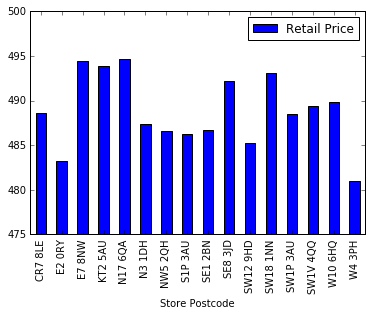

In [15]:
q33a = df33[['Store Postcode','Retail Price']]
q33a = q33a.groupby(['Store Postcode']).mean()
q33a.plot(kind='bar',ylim=[475,500])
q33a = q33a.reset_index()
print "Max:\n ",q33a[q33a['Retail Price']==q33a['Retail Price'].max()]
store_number_max = q33a[q33a['Retail Price']==q33a['Retail Price'].max()]['Store Postcode'] #let's just keep this for later
print "Min:\n ",q33a[q33a['Retail Price']==q33a['Retail Price'].min()]
store_number_min = q33a[q33a['Retail Price']==q33a['Retail Price'].min()]['Store Postcode']

So if we look at the output provided above, we can see that N17 6QA has the highest average retail price among its competitors. On the other hand, W4 3PH has the lowest average retail price among its competitors.

### Question 3.3 (b) 
#### To better compare retail prices across stores, create side-by-side boxplots of retail price by store. Now compare the prices in teh two stores above. Does there seem to be a difference between their price distributions?

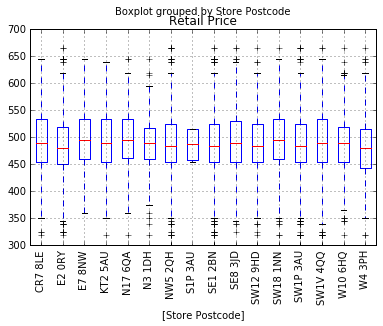

In [16]:
df33[['Store Postcode','Retail Price']].boxplot(by='Store Postcode',rot=90)

In [17]:
df33[['Store Postcode','Retail Price']].groupby('Store Postcode').describe().unstack()

Retail Price                                               \
                      count        mean        std    min     25%    50%   
Store Postcode                                                             
CR7 8LE               210.0  488.619048  64.215901  300.0  455.00  490.0   
E2 0RY                856.0  483.171729  59.634008  320.0  450.00  480.0   
E7 8NW                 97.0  494.381443  55.246878  360.0  460.00  495.0   
KT2 5AU               105.0  493.904762  63.431448  320.0  455.00  490.0   
N17 6QA               123.0  494.634146  58.625551  320.0  462.50  495.0   
N3 1DH                 95.0  487.368421  62.342747  320.0  460.00  490.0   
NW5 2QH               870.0  486.580460  62.124841  300.0  455.00  485.0   
S1P 3AU                 4.0  486.250000  33.260337  455.0  458.75  487.5   
SE1 2BN              1232.0  486.680195  62.678645  300.0  455.00  485.0   
SE8 3JD               450.0  492.177778  60.003077  300.0  455.00  490.0   
SW12 9HD              372.0  485.295699  61.253032  300.0  455.00  485.0   
SW18 1NN              334.0  493.038922  64.927552  300.0  460.00  495.0   
SW1P 3AU             1604.0  488.506858  58.616557  300.0  455.00  485.0   
SW1V 4QQ             1145.0  489.344978  64.634588  300.0  455.00  490.0   
W10 6HQ               300.0  489.866667  58.172982  300.0  455.00  490.0   
W4 3PH                159.0  481.006289  68.232152  300.0  442.50  480.0   

                              
                  75%    max  
Store Postcode                
CR7 8LE         535.0  645.0  
E2 0RY          520.0  665.0  
E7 8NW          535.0  645.0  
KT2 5AU         535.0  640.0  
N17 6QA         535.0  645.0  
N3 1DH          517.5  645.0  
NW5 2QH         525.0  665.0  
S1P 3AU         515.0  515.0  
SE1 2BN         525.0  665.0  
SE8 3JD         530.0  665.0  
SW12 9HD        525.0  665.0  
SW18 1NN        535.0  665.0  
SW1P 3AU        525.0  665.0  
SW1V 4QQ        535.0  665.0  
W10 6HQ         520.0  665.0  
W4 3PH          515.0  665.0

So something that you might be wondering based on the boxplot that was provided in a cell above is: why does S1P 3AU look so much more different than the others? Well, as shown in the table above, we can see that this store only has 4 transactions in the data which explains for the comparatively abnormal figure.

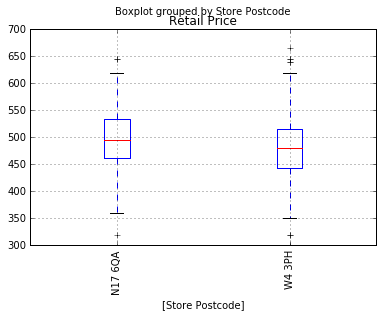

In [18]:
q33b = df33[['Store Postcode','Retail Price']]
max_store = q33b.ix[q33b['Store Postcode'] == store_number_max.min()]
min_store = q33b.ix[q33b['Store Postcode'] == store_number_min.min()]
q33b_new = max_store.append(min_store)
evaluate_max_min = q33b_new.boxplot(by='Store Postcode',rot=90)

If we look at the price distributions of the two stores (the max and the min for average retail price), we can see that the distribution of the "max average" store's mean and the concentration of most of the observations are higher than the "min average" store. The "min average" store's distribution also appears to be a bit wider than the "max average" store's.

## Question 3.4

The file LaptopSales.txt is a comma-separated fiel with nearly 300,000 rows. ENBIS (the European Network for Business and Industrial Statistics) provided these data as part of a contest organized in the fall of 2009.

Scenario: Imagine that you are a new analyst for a company called Acell (a company sellign laptops). You have been provided with data about products and sales. You need to help the company with their business goal of planning a product strategy and pricing policies that will maximize Acell's projected revenues in 2009...Check to ensure that the data and modeling types in the data table are correct for each of the variables, and answer the following questions...

In [19]:
df34 = pd.read_csv('C:\Users\Jonathan\Documents\JMP_Data\LaptopSales.csv',sep=',',header=0)
df34 = df34[df34['Retail Price'].notnull()]

### Question 3.4 (a)

#### Question 3.4 (a) i. At what price are the laptops actually selling?

The mean is:  508.125935755
The median is:  500.0
The mode is:  510.0
Lower 95%:  298.902357666
Upper 95%:  717.349513843


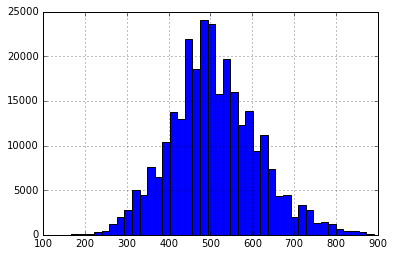

In [20]:
df34['Retail Price'].hist(bins=40)
print "The mean is: ",df34['Retail Price'].mean()
print "The median is: ",df34['Retail Price'].median()
print "The mode is: ",df34['Retail Price'].mode()[0]
print "Lower 95%: ", (df34['Retail Price'].mean()-2*df34['Retail Price'].std())
print "Upper 95%: ", (df34['Retail Price'].mean()+2*df34['Retail Price'].std())

We can see from the mean, median, and mode that laptops are generally sold in the region of 500-510 dollars. If we wished to broadened the price range, we could take a quick look and give a rough estimate that most of the laptops are sold in 400-600 dollar range.

#### Question 3.4 (a) ii. Does price change with time?

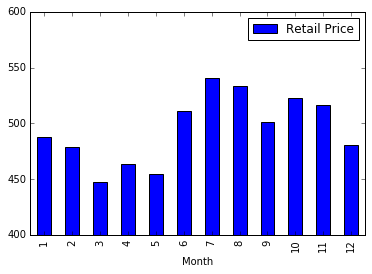

In [21]:
month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
              'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df34['Month'] = df34.Date.apply(lambda x: str(x)[2:5])
df34aii = df34[df34.Month!='n']
df34aii.Month = df34aii.Month.apply(lambda x: month_dict[x])
df34aii[['Month','Retail Price']].groupby('Month').mean().reset_index().plot(x='Month',y='Retail Price',kind='bar',ylim = [400,600],rot=90)

Based on a monthly view of the retail prices overtime, it looks like prices are fairly low during March, April, and May but increase substantially during the summer months of June, July, and August. Perhaps a reason for this is because weather changes might influence buyer mood/decisions or perhaps students are purchasing laptops during this time before they go back to school.

#### Question 3.4(a) iii. Are prices consistent with retail outlets?

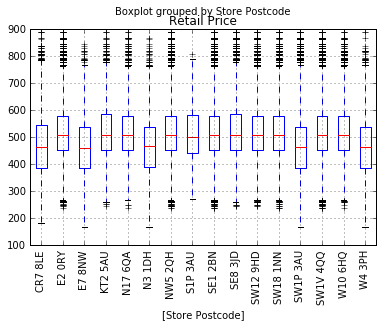

In [22]:
df34[['Store Postcode','Retail Price']].boxplot(by='Store Postcode',rot=90)

Looking at each distribution we can see that there is some variation between retail price distributions. Some stores have lower average and the range for sale concentrations vary between store. However, these distributions don't differ too dramatically except for the case of S1P 3AU which may be due to the lack of data.

#### Question 3.4(a) iv. How does price change with configuration?

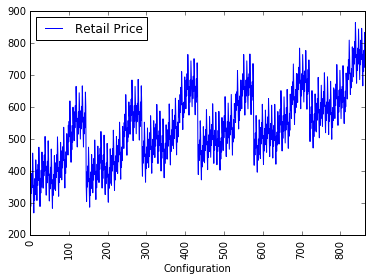

In [23]:
q34biv = df34[['Configuration','Retail Price']]
q34biv = q34biv.groupby(['Configuration']).mean()
q34biv.plot(rot=90) #price increases with configuration

We can see that configuration does result in an impact on retail prices. Later configurations generate higher prices.

### Question 3.4 (b)

#### Question 3.4(b) i. Where are the stores and customers located?

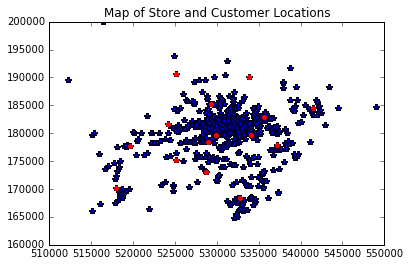

In [24]:
plt.figure()
plt.plot(df34['customer X'],df34['customer Y'],'b*',df34['store X'],df34['store Y'],'r.')
plt.title('Map of Store and Customer Locations')
plt.show()

Above the customer locations and store locations are plotted. We can see that for the most part, the customers aren't terribly far from the stores except for a few outliers given the scale provided.

#### Question 3.4(b) ii. Which stores are selling the most?

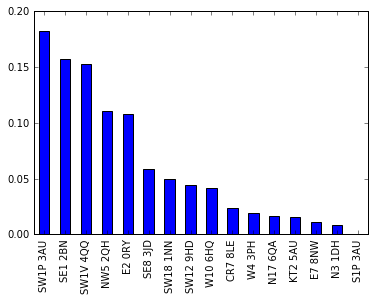

In [25]:
q34bi = df34[['Store Postcode','Customer Postcode']]
q34bi['Store Postcode'].value_counts('Customer Postcode').plot(kind='bar')

So, if we take a look at the max and min, we can see that SW1P 3AU is selling the most. But wait, S1P 3AU is the least. This looks like a potential problem. There may have been an ommitted leter in the data entering process and these might be the same store postcodes! For now, I am going to be a little conservative and say that they are not the same. I took a look at the coordinate X and Y values for S1P 3AU and they are "nan" for both which is unfortunate. This means that I can't make a quick comparison to the X and Y value coordinates of SW1P 3AU to confidently confirm that they are the same.

#### Question 3.4(b) iii. How far would customers travel to buy a laptop?

The below bar chart provides the average distance traveled per store.


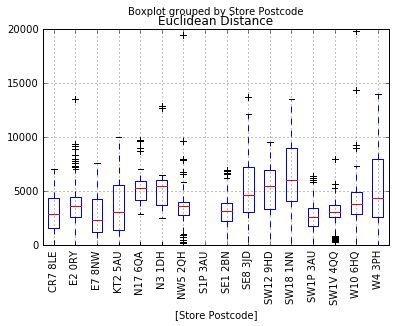

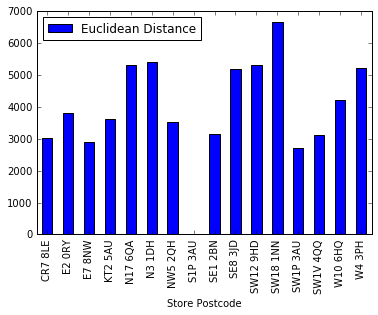

In [26]:
df34['Euclidean Distance'] = np.sqrt((df34['store X'] - df34['customer X'])**2 + (df34['store Y'] - df34['customer Y'])**2)
df34[['Store Postcode','Euclidean Distance']].boxplot(by='Store Postcode',rot=90)
print "The below bar chart provides the average distance traveled per store."
df34[['Store Postcode','Euclidean Distance']].groupby('Store Postcode').mean().plot(kind='bar',rot=90)

Save S1P 3AU which has no coordinate data, we can see that generally people travel between 3000 and 5000 units to a store.

#### Question 3.4(b) iv. Try an alternative way of looking at how far customers traveled. Do this by creating a new data column that computes the distance between customer and store.

The below bar chart provides the average Manhattan distance traveled per store.


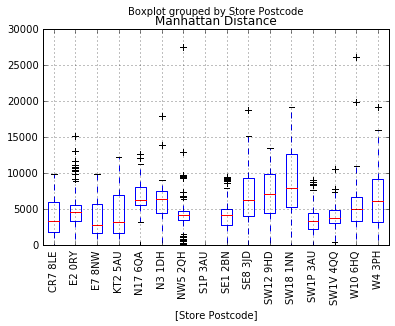

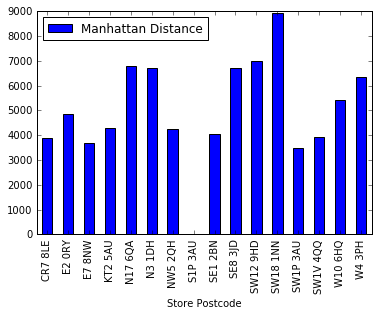

In [28]:
df34['Manhattan Distance'] = np.abs(df34['store X'] - df34['customer X']) + np.abs(df34['store Y'] - df34['customer Y'])
df34[['Store Postcode','Manhattan Distance']].boxplot(by='Store Postcode',rot=90)
print "The below bar chart provides the average Manhattan distance traveled per store."
df34[['Store Postcode','Manhattan Distance']].groupby('Store Postcode').mean().plot(kind='bar',rot=90)

If we use the Manhattan distance, we can see that the values increase quite a bit. The new range is on average between 4000 and ~6500 units.